# Logistic Regression Pipeline for H1ESC (GREG)

### Loading Packages

In [1]:
install.packages("glmnet", repos = "https://cran.us.r-project.org")
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.0-2



### Loading Data

In [2]:
h1escgreg <- read.table("H1ESCforML.txt", header = TRUE) ## loading data
h1escgreg <- h1escgreg[, -c(1:3)] ## removing the first three columns for non-usage in the ML model.

In [3]:
colnames(h1escgreg)

[1] "CTCF"     "EP300"    "H3K27me3" "H3K36me3" "H3K4me1"  "H3K4me2" 
 [7] "H3K4me3"  "H3K9ac"   "H3K9me3"  "RAD21"    "RNA.Seq"  "RNAPol2" 
[13] "YY1"      "Class"

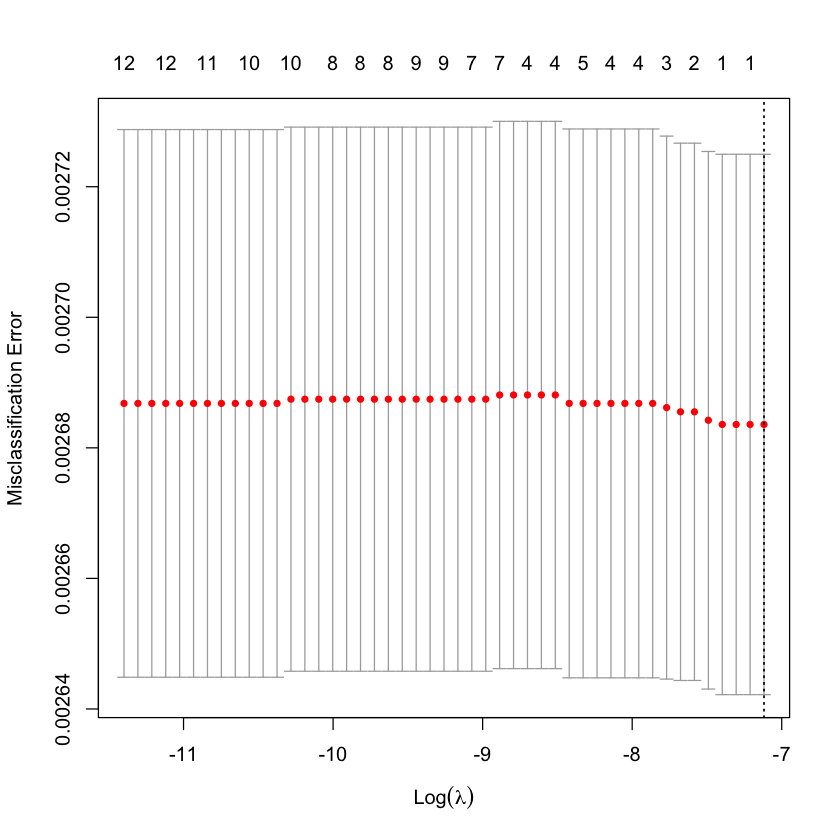

In [4]:
set.seed(005)
cv.modelfit <- cv.glmnet(as.matrix(h1escgreg[,1:13]),
                         h1escgreg$Class,
                         family = "binomial",
                         type.measure = "class",
                         alpha = 1,
                         nlambda = 100)


plot(cv.modelfit)

In [5]:
cat("There are", length(cv.modelfit$lambda),
    "lambda values in all:\n",
    cv.modelfit$lambda,
    "\n, out of which",
    min(cv.modelfit$lambda),
    "is the minimum, while",
    cv.modelfit$lambda.1se,
    "denotes the value at which the model is optimized at one standard error.")

There are 47 lambda values in all:
 0.0008099085 0.0007379584 0.0006724002 0.0006126661 0.0005582385 0.0005086461 0.0004634594 0.000422287 0.0003847721 0.00035059 0.0003194446 0.000291066 0.0002652085 0.0002416481 0.0002201808 0.0002006205 0.0001827979 0.0001665587 0.0001517621 0.0001382799 0.0001259955 0.0001148024 0.0001046037 9.5311e-05 8.684383e-05 7.912886e-05 7.209927e-05 6.569417e-05 5.985808e-05 5.454046e-05 4.969523e-05 4.528045e-05 4.125786e-05 3.759262e-05 3.4253e-05 3.121005e-05 2.843744e-05 2.591114e-05 2.360926e-05 2.151188e-05 1.960082e-05 1.785954e-05 1.627295e-05 1.48273e-05 1.351009e-05 1.230989e-05 1.121631e-05 
, out of which 1.121631e-05 is the minimum, while 0.0008099085 denotes the value at which the model is optimized at one standard error.

In [6]:
set.seed(2)
modelfit <- glmnet(as.matrix(h1escgreg[,1:13]),
                   h1escgreg$Class,
                   family = "binomial",
                   alpha = 1,
                   lambda = min(cv.modelfit$lambda))
# Listing non-zero coefficients
print(modelfit$beta[,1])

Warning message:
“from glmnet Fortran code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message in getcoef(fit, nvars, nx, vnames):
“an empty model has been returned; probably a convergence issue”


    CTCF    EP300 H3K27me3 H3K36me3  H3K4me1  H3K4me2  H3K4me3   H3K9ac 
       0        0        0        0        0        0        0        0 
 H3K9me3    RAD21  RNA.Seq  RNAPol2      YY1 
       0        0        0        0        0 


In [6]:
coef(modelfit)[,1]
predict(modelfit, type="coef")

(Intercept)         CTCF        EP300     H3K27me3     H3K36me3      H3K4me1 
 6.920308396 -0.085831339 -0.044517940 -0.044367058 -0.170825653 -0.021758567 
     H3K4me2      H3K4me3       H3K9ac      H3K9me3        RAD21      RNAPol2 
-0.020956371  0.000000000 -0.004894414  0.024193190  0.055130404  0.000000000 
         YY1 
-0.003314569

13 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  6.920308396
CTCF        -0.085831339
EP300       -0.044517940
H3K27me3    -0.044367058
H3K36me3    -0.170825653
H3K4me1     -0.021758567
H3K4me2     -0.020956371
H3K4me3      .          
H3K9ac      -0.004894414
H3K9me3      0.024193190
RAD21        0.055130404
RNAPol2      .          
YY1         -0.003314569

In [7]:
a549greg1 <- a549greg ## creating a copy

set.seed(7) # for reproducibility of results.
a549greg1$Class <- as.numeric(as.factor(a549greg1$Class))-1
part <- sample(2, nrow(a549greg1),
               replace = TRUE,
               prob = c(0.7,0.3))
train <- a549greg1[part==1,]
test <- a549greg1[part==2,]
cat("So, now we have",
    nrow(train),
    "training rows and",
    nrow(test),
    "testing rows")

a549model <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = train,
               family = "binomial")
summary(a549model)

So, now we have 1084098 training rows and 464194 testing rows


Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7403   0.0447   0.0472   0.0503   1.3729  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.959420   0.037984 183.222  < 2e-16 ***
CTCF        -0.094653   0.019751  -4.792 1.65e-06 ***
EP300       -0.051034   0.015085  -3.383 0.000717 ***
H3K27me3    -0.054348   0.027518  -1.975 0.048270 *  
H3K36me3    -0.199052   0.024497  -8.126 4.45e-16 ***
H3K4me1     -0.022018   0.005050  -4.360 1.30e-05 ***
H3K4me2     -0.018517   0.014482  -1.279 0.201053    
H3K4me3     -0.003461   0.013194  -0.262 0.793084    
H3K9ac      -0.006333   0.002411  -2.627 0.008613 ** 
H3K9me3      0.053392   0.024997   2.136 0.032681 *  
RAD21        0.068889   0.017775   3.876 0.000106 ***
RNAPol2      0.005664   0.006809   0.832

In [8]:
install.packages("rms",repos = "https://cran.us.r-project.org")
library(rms)

vif(a549model)

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




CTCF    EP300 H3K27me3 H3K36me3  H3K4me1  H3K4me2  H3K4me3   H3K9ac 
2.046442 2.231692 1.251035 1.831821 2.196112 5.743539 6.961026 2.146276 
 H3K9me3    RAD21  RNAPol2      YY1 
1.867863 3.928311 2.443076 3.464700

In [9]:
yTrain <- predict(a549model, train, type = "response")
head(yTrain)

2         3         4         5         7         9 
0.9990513 0.9990513 0.9990513 0.9990513 0.9990167 0.9990329

In [10]:
head(train)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.00000000,0.0000000,0,0,0.0000000,0,0,0.0000000,0.00000000,0.00000000,0.00000000,0,1
3,0.00000000,0.0000000,0,0,0.0000000,0,0,0.0000000,0.00000000,0.00000000,0.00000000,0,1
4,0.00000000,0.0000000,0,0,0.0000000,0,0,0.0000000,0.00000000,0.00000000,0.00000000,0,1
5,0.00000000,0.0000000,0,0,0.0000000,0,0,0.0000000,0.00000000,0.00000000,0.00000000,0,1
7,0.00000000,0.0000000,0,0,1.3254480,0,0,1.0985050,0.00000000,0.00000000,0.06050439,0,1
9,0.04382778,0.0267345,0,0,0.8316537,0,0,0.6957198,0.02891425,0.05436713,0.66554834,0,1


In [11]:
prediction_probabilities_train <- ifelse(yTrain > 0.5, 1, 0) # Probabilities to Labels conversion
confusion_matrix_train <- table(Predicted = prediction_probabilities_train, Actual = train$Class)
print(confusion_matrix_train)

         Actual
Predicted       0       1
        0       0       2
        1    1333 1082763


In [12]:
misclassfication_error_train <- 1- sum(diag(confusion_matrix_train))/sum(confusion_matrix_train)
cat("The misclassification error in train data is",
    (round(misclassfication_error_train*100)), "percent")

The misclassification error in train data is 0 percent

In [13]:
yTest <- predict(a549model, test, type = "response")
prediction_probabilities_test <- ifelse(yTest > 0.5, 1, 0)
confusion_matrix_test <- table(Predicted = prediction_probabilities_test, Actual = test$Class)
print(confusion_matrix_test)

         Actual
Predicted      0      1
        1    615 463579


In [14]:
misclassfication_error_test <- 1- sum(diag(confusion_matrix_test))/sum(confusion_matrix_test)
cat("The misclassification error in test data is",
    (round(misclassfication_error_test*100)), "percent")

The misclassification error in test data is 100 percent

In [15]:
overall_p <- with(a549model,
                  pchisq(null.deviance-deviance,
                         df.null-df.residual,
                         lower.tail = FALSE))
cat("The statistical significance for the model is", overall_p, "\n")

The statistical significance for the model is 2.360073e-36 


In [16]:
cat("The confidence level for this model is",
    ((1-overall_p)*100), "percent")

The confidence level for this model is 100 percent